## Data Processing

In [46]:
# Data = CMAPSSData
# Source = https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/
# Dataset = Turbofan Engine Degradation Simulation Data Set

In [47]:
# Data to be used - Train and Test data for 1

In [48]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

### Notebook options

In [49]:
pd.set_option('display.max_colwidth', -1) # Column width
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

### Data Directories

In [50]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [51]:
input_file = INPUT_DIR + 'train_FD001.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df_raw = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [52]:
df_raw.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas17,meas18,meas19,meas20,meas21,meas22,meas23,meas24,meas25,meas26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


In [53]:
cols = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3']
df_raw[cols].describe()

,unit,time_cycles,setting1,setting2,setting3
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0
std,29.227633,68.880990,0.002187,0.000293,0.0
min,1.000000,1.000000,-0.008700,-0.000600,100.0
25%,26.000000,52.000000,-0.001500,-0.000200,100.0
50%,52.000000,104.000000,0.000000,0.000000,100.0
75%,77.000000,156.000000,0.001500,0.000300,100.0
max,100.000000,362.000000,0.008700,0.000600,100.0


In [54]:
cols = ['meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07']
df_raw[cols].describe()

,meas01,meas02,meas03,meas04,meas05,meas06,meas07
count,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000
mean,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711
std,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092
min,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000
25%,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000
50%,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000
75%,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000
max,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000


In [55]:
cols = ['meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14']
df_raw[cols].describe()

,meas08,meas09,meas10,meas11,meas12,meas13,meas14
count,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000
mean,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722
std,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176
min,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000
25%,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000
50%,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000
75%,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000
max,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000


In [56]:
cols = ['meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 'meas21']
df_raw[cols].describe()

,meas15,meas16,meas17,meas18,meas19,meas20,meas21
count,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [57]:
df_raw[['unit', 'time_cycles']].groupby('unit').count()

,time_cycles
unit,
1,192
2,287
3,179
4,189
5,269
6,188
7,259
8,150
9,201


### Data Statistics

In [58]:
features = list(set(col_headers) - set(['time_cycles','unit']))
print(features)

['meas12', 'setting1', 'setting2', 'meas13', 'meas18', 'meas16', 'meas06', 'meas11', 'meas03', 'meas02', 'meas09', 'meas19', 'meas25', 'meas21', 'meas24', 'meas07', 'meas04', 'meas14', 'meas22', 'meas23', 'meas01', 'meas10', 'meas17', 'meas26', 'meas15', 'meas08', 'meas20', 'setting3', 'meas05']


In [72]:
df_stats = pd.DataFrame(columns=['feature', 
                                 'total_count', 
                                 'missing_val_count', 
                                 'max_val', 
                                 'min_val', 
                                 'variance', 
                                 'std', 
                                 'mean_val', 
                                 'median_val', 
                                 'kurt', 
                                 'skew'])

idx = 0
for feature in features:
    
    df = df_raw[['unit', feature]]
    
    new_row = {
        'feature':feature, 
        'total_count': len(df), 
        'missing_val_count': len(df)-df[feature].count(), 
        'max_val': df[feature].max(), 
        'min_val': df[feature].min(), 
        'variance': df[feature].var(), 
        'std': df[feature].std(), 
        'mean_val': df[feature].mean(), 
        'median_val': df[feature].median(), 
        'kurt': df[feature].kurt(), 
        'skew': df[feature].skew()
    }
    
    df_stats.loc[idx] = new_row
    idx += 1
        
# Get the percentage missing values
df_stats['perc_missing'] = df_stats['missing_val_count']/df_stats['total_count'] * 100

In [73]:
df_stats

,feature,total_count,missing_val_count,max_val,min_val,variance,std,mean_val,median_val,kurt,skew,perc_missing
0,meas12,20631,0,523.3800,518.6900,5.439850e-01,7.375534e-01,521.413470,521.4800,-0.144917,-0.442407,0
1,setting1,20631,0,0.0087,-0.0087,4.784340e-06,2.187313e-03,-0.000009,-0.0000,-0.009132,-0.024766,0
2,setting2,20631,0,0.0006,-0.0006,8.588541e-08,2.930621e-04,0.000002,0.0000,-1.130447,0.009085,0
3,meas13,20631,0,2388.5600,2387.8800,5.172330e-03,7.191892e-02,2388.096152,2388.0900,0.387244,0.469792,0
4,meas18,20631,0,2388.0000,2388.0000,0.000000e+00,0.000000e+00,2388.000000,2388.0000,0.000000,0.000000,0
5,meas16,20631,0,0.0300,0.0300,2.422479e-28,1.556432e-14,0.030000,0.0300,0.000000,0.000000,0
6,meas06,20631,0,21.6100,21.6000,1.929279e-06,1.388985e-03,21.609803,21.6100,45.846746,-6.916813,0
7,meas11,20631,0,48.5300,46.8500,7.133568e-02,2.670874e-01,47.541168,47.5100,-0.172192,0.469329,0
8,meas03,20631,0,1616.9100,1571.0400,3.759099e+01,6.131150e+00,1590.523119,1590.1000,0.007762,0.308946,0
9,meas02,20631,0,644.5300,641.2100,2.500533e-01,5.000533e-01,642.680934,642.6400,-0.112043,0.316526,0


### Plotting Variances

In [74]:
def stats_plot(df_stats, use_tags=[], stat_col='variance', feature_col = 'feature'):
            
    df_variances = df_stats[[feature_col, stat_col]]
    df_variances = df_variances.loc[df_variances[stat_col] > 0.05]
    df_variances = df_variances.sort_values([stat_col], ascending=False)
    x = df_variances[feature_col]
    y = df_variances[stat_col]
    x_pos = np.arange(len(x))

    plt.bar(x_pos, y, align='center', alpha=0.5)
    plt.xticks(x_pos, x, rotation=45)
    plt.xlabel('Features')
    plt.ylabel(stat_col)
    plt.title(str(stat_col) + ' among different parameters')

    plt.show()

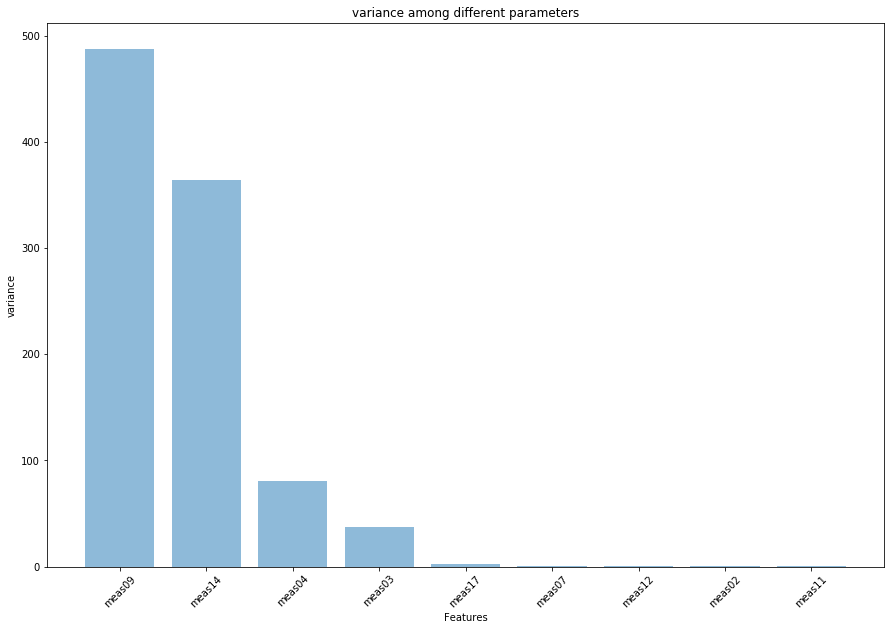

In [75]:
stats_plot(df_stats, [], 'variance', 'feature')

### Remove un-ncessary rows and columns from the data

In [76]:
df_raw.drop(columns=['meas22','meas23','meas24','meas25','meas26'], inplace=True)
df_raw.dropna(inplace=True)

### Writing to file

In [80]:
output_file = OUTPUT_DIR + 'train_case1.csv'
df_raw.to_csv(output_file, sep=',', index=False)

### Reading from a file to check vals

In [81]:
df_test = pd.read_csv(output_file)

In [82]:
df_test.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas12,meas13,meas14,meas15,meas16,meas17,meas18,meas19,meas20,meas21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
